In [1]:
import spacy
nlp = spacy.load('en_core_web_lg')
import sys
sys.path.insert(0, '/Users/leon/Income/python files/Telesales-QA-Framework')
from helper.text_preprocessing import *

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Customize pattern
pattern_ls = [{"pattern": [[{"LOWER": "charter"}, {"LOWER": "plus"}]], "attr": {"TAG": "NN", "POS": "NOUN"}}]

In [3]:
pattern_ls[0]['pattern'][0]

[{'LOWER': 'charter'}, {'LOWER': 'plus'}]

In [4]:
# Input text
text = "You are the charter plus member."

In [5]:
# initialize ruler
ruler = nlp.get_pipe('attribute_ruler')

In [6]:
for i in pattern_ls:
    index_len = len(i['pattern'][0])
    for j in range(index_len):
        ruler.add(patterns = i['pattern'], attrs = i['attr'], index = j)

In [7]:
doc = nlp(text)

In [8]:
print(doc[3].tag_, doc[3].pos_)
print(doc[4].tag_, doc[4].pos_)

NN NOUN
NN NOUN


In [9]:
with open("../transcripts/VL220822.txt") as f:
    text2 = f.read()
# Text preprocessing
transcript = text_preprocessing(text2)

In [10]:
transcript

'okay this is alice here coming from income ntuc income okay currently we partnership with ocbc plus can i check with you if you a good time to speak for a while first of course thank you for using ocbc okay and then secondly as a valued customer we would like to actually update and also give you a priority okay because in year twenty twenty right income actually celebrate our fiftieth annivesary okay and then in that particular year we actually came out a very very special anniversary policy called i fifty okay of course i stand for income income fifty means for fifty years alright okay miss junar even you already have a existing policy right okay then we even make it very very special because we can cover for your whole family member at one flat premium okay and this regardless of your age secondly right we garden to how many dependent are children you have as well as regardless of your occupation and also your occupation economic security is an important pillar of national and regio

In [11]:
# try sentence segmentation
doc2 = nlp(transcript)

In [18]:
sentence_ls = []

In [19]:
for sent in doc2.sents:
    sentence_ls.append(sent.text)

In [22]:
sentence_ls

['okay this is alice here coming from income ntuc income',
 'okay currently we partnership with ocbc plus can i check with you if you a good time to speak for a while first of course thank you for using ocbc',
 'okay',
 'and then secondly as a valued customer we would like to actually update and also give you a priority okay',
 'because in year twenty twenty right income actually celebrate our fiftieth annivesary okay',
 'and then in that particular year we actually came out a very very special anniversary policy called i fifty',
 'okay of course i stand for income income fifty means for fifty years',
 'alright',
 'okay miss junar',
 'even you already have a existing policy',
 'right',
 'okay then we even make it very very special because we can cover for your whole family member at one flat premium',
 'okay',
 'and this regardless of your age secondly',
 'right we garden to how many dependent are children you have as well as regardless of your occupation and also your occupation econo

In [ ]:
def cluster_part(parts, cluster_threshold = 8, sen_return_type = "string"):
    sen_return_type = sen_return_type.lower()
    if sen_return_type != "string" and sen_return_type != "list":
        raise Exception(f"Current return type {sen_return_type} is not supported.")
    label_sen = []
    temp_sen = []
    just_sen = []
    # If false, means we won't store current sentence to the temporary list, Otherwise, store the current sentence
    # and insert to the front of the next sentence
    activated = False
    for sentence, label in zip(parts[0], parts[1]):
        if len(sentence) < cluster_threshold and len(temp_sen) < cluster_threshold:
            activated = True
            temp_sen.extend(sentence)
            continue
        else:
            activated = False
            if temp_sen:
                sentence = temp_sen + sentence
                temp_sen = []
            if sen_return_type == "string":
                sentence = " ".join([i for i in sentence])
            label_sen.append([label, sentence])    
            just_sen.append(sentence)
    return label_sen, just_sen

In [36]:
def sentencizer(sentence_ls, cluster_threshold = 5):
    temp_sen = ""
    new_sen = []
    activated = False
    temp_count = 0
    for sentence in sentence_ls:
        count = len(sentence.split())
        if count < cluster_threshold:
            if not temp_sen:
                temp_sen = sentence
            else:
                temp_sen += " " + sentence
        else:
            sentence = temp_sen + " " + sentence
            new_sen.append(sentence)
            temp_sen = ""
    return new_sen

In [46]:
ls = sentencizer(sentence_ls)

In [32]:
sen = " hello hi"

In [33]:
sen.split()

['hello', 'hi']

In [29]:
temp_sen = []

In [30]:
temp_sen.extend(sen)

In [38]:
temp_sen

['h', 'e', 'l', 'l', 'o', ' ', 'h', 'i']

In [39]:
from spacy.language import Language

In [43]:
for token in doc:
    print(token)

You
are
the
charter
plus
member
.


In [44]:
grammars = r""" 
    JP: {<JJ.*>}
    NP: {<JP|CD>*<PRP.*|DT|NN.*>+}
    PP: {<IN|TO|RP><NP|VB.*>} 
    VP: {<VB.*|RB.*>+<PP|NP>*}
    Sentence: {<UH>*<JP|NP>*<MD|IN>*<VP|PP|NP|JP>+}
    Question: {<MD|WDT|DP|WRB|><MD>*<Sentence|NP|PP|VP|JP>}
"""

In [45]:
from helper.pos_helper import *

In [47]:
tree = parse(doc2, grammars)

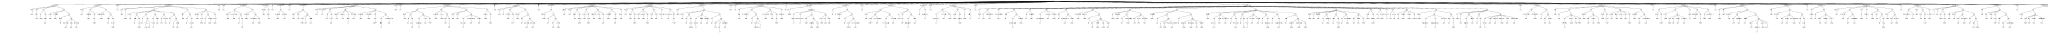

In [48]:
tree

In [49]:
parts = run_traverse(tree)

In [50]:
parts

([['okay',
   'this',
   'is',
   'alice',
   'here',
   'coming',
   'from',
   'income',
   'ntuc',
   'income'],
  ['okay', 'currently', 'we', 'partnership', 'with', 'ocbc', 'plus'],
  ['can',
   'i',
   'check',
   'with',
   'you',
   'if',
   'you',
   'a',
   'good',
   'time',
   'to',
   'speak',
   'for',
   'a',
   'while',
   'first',
   'of',
   'course',
   'thank',
   'you',
   'for',
   'using',
   'ocbc',
   'okay',
   'and'],
  ['then', 'secondly', 'as', 'a', 'valued', 'customer', 'we'],
  ['would', 'like', 'to'],
  ['actually', 'update', 'and'],
  ['also', 'give', 'you', 'a', 'priority'],
  ['okay',
   'because',
   'in',
   'year',
   'twenty',
   'twenty',
   'right',
   'income',
   'actually',
   'celebrate',
   'our',
   'fiftieth',
   'annivesary',
   'okay',
   'and'],
  ['then',
   'in',
   'that',
   'particular',
   'year',
   'we',
   'actually',
   'came',
   'out',
   'a',
   'very',
   'very',
   'special',
   'anniversary',
   'policy',
   'called',
  